In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit as fit
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd
# import jscatter as js
import sys
import os
from scipy.optimize import curve_fit

# Loading data and variables

In [3]:
Iqs=np.load('../03-source/id02/Iq.npy')
data = np.genfromtxt('../03-source/id02/ferr_ff-gly.dat')
data1 = np.genfromtxt('../03-source/id02/ferritin-ff-s13.dat')


concs = [404,180,70,10]
specific_volume_protein = 0.465e-3 #%ml mg−1
vf_i = specific_volume_protein*np.array(concs)#[.165,.125,.095]
print(vf_i)

qf=data[:,0]
ff=data[:,1]

qf1=data1[:,0]
ff1=data1[:,1]


[0.18786 0.0837  0.03255 0.00465]


# plot I(q)

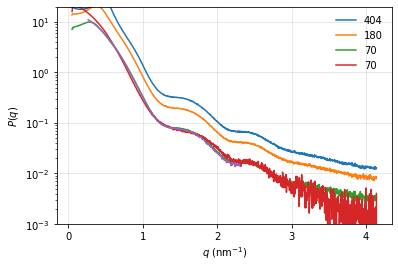

In [4]:
plt.figure()
for i in range(3):
    plt.plot(Iqs[-1],Iqs[i],label=concs[i])
plt.plot(Iqs[-1],Iqs[-2]*10,label=concs[i])

plt.plot(qf1[ff1>0],ff1[ff1>0])

plt.yscale('log')
plt.legend(frameon=False)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(1E-3,2E1)
plt.xlabel('$q$ (nm$^{-1}$)')
plt.ylabel('$P(q)$')


plt.grid('on',lw=1,alpha=.3)

# Plot form factor

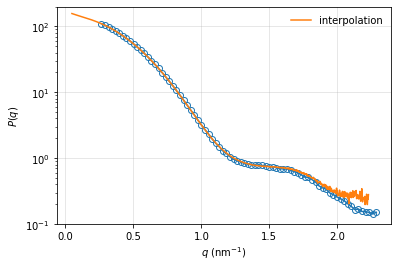

In [5]:
plt.figure()
#plt.plot(qf[ff>0],ff[ff>0])
plt.plot(qf1[::5],ff1[::5]*10,marker='o',mfc='none')
q_form_factor=qf1[ff1>0]
form_factor=ff1[ff1>0]


z = np.polyfit(q_form_factor,form_factor*10, 11)
p15 = np.poly1d(z)
def ff15(q):
    return np.array(p15(q))


#plt.plot(Iqs[-1],Iqs[3])
plt.plot(Iqs[-1,:-700],ff15(Iqs[-1,:-700]),label='interpolation')

plt.yscale('log')
plt.legend(frameon=False)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(1E-1,200)
plt.xlabel('$q$ (nm$^{-1}$)')
plt.ylabel('$P(q)$')


plt.grid('on',lw=1,alpha=.3)

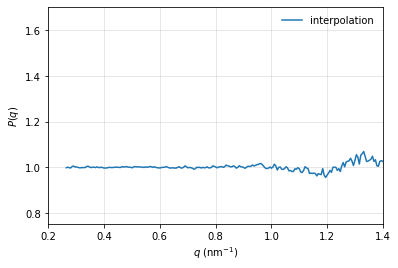

In [6]:
plt.figure()
#plt.plot(qf[ff>0],ff[ff>0])
#plt.plot(qf1[::5],ff1[::5]*10,marker='o',mfc='none')
q_form_factor=qf1[ff1>0]
form_factor=ff1[ff1>0]


z = np.polyfit(q_form_factor,form_factor*10, 12)
p15 = np.poly1d(z)
def ff15(q):
    return np.array(p15(q))


#plt.plot(Iqs[-1],Iqs[3])
plt.plot(qf1[:],ff1[:]*10/ff15(qf1[:]),label='interpolation')

#plt.yscale('log')
plt.legend(frameon=False)
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(.2,1.4)
#plt.ylim(1E-1,200)
plt.xlabel('$q$ (nm$^{-1}$)')
plt.ylabel('$P(q)$')


plt.grid('on',lw=1,alpha=.3)

# Plot S(q)

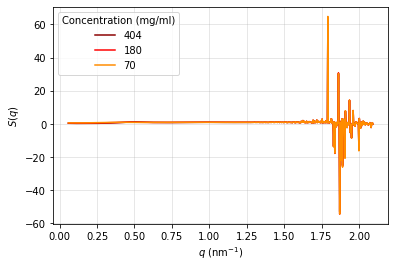

In [7]:
colore_concentration=['darkred','red','darkorange','gold']#['darkblue','blue','dodgerblue','lightblue','forestgreen']
S=[]

qmax=-750
plt.figure()
for i in range(3):
    y=Iqs[i,4:qmax]/ff15(Iqs[-1,4:qmax])
    plt.plot(Iqs[-1,4:qmax],y/(np.mean(y[300:-200])),label=concs[i],color=colore_concentration[i])
    S+=[y/(np.mean(y[300:-200]))]
    qS=Iqs[-1,4:qmax]
plt.legend(title='Concentration (mg/ml)'),
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0,1E-1)
plt.xlabel('$q$ (nm$^{-1}$)')
plt.ylabel('$S(q)$')


plt.grid('on',lw=1,alpha=.3)

S=np.array(S)

In [8]:
# np.save('q.npy',qS)

In [278]:
test=np.load('Structurefactors.npy')
qtest=np.load('q.npy')

In [279]:
np.shape(qtest)

(746,)

# Fit S(q)

In [179]:
concs=[404,180,70,10]

concs=[400,200,100,10]

specific_volume_protein=0.465e-3 #%ml mg−1
vf_i=specific_volume_protein*np.array(concs)#[.165,.125,.095]
print(vf_i)

[0.186   0.093   0.0465  0.00465]


## 2 Yukawa fit

[4.83050964 1.62323342 0.03879112 0.07558664]
[0.10000001 2.00000003 0.04166666 0.07576006]
Output TY_SolveEquation:  no root found
Output TY_SolveEquation:  no root found
Output TY_SolveEquation:  no root found
[0.10008416 2.00017557 0.04176227 0.07799825]


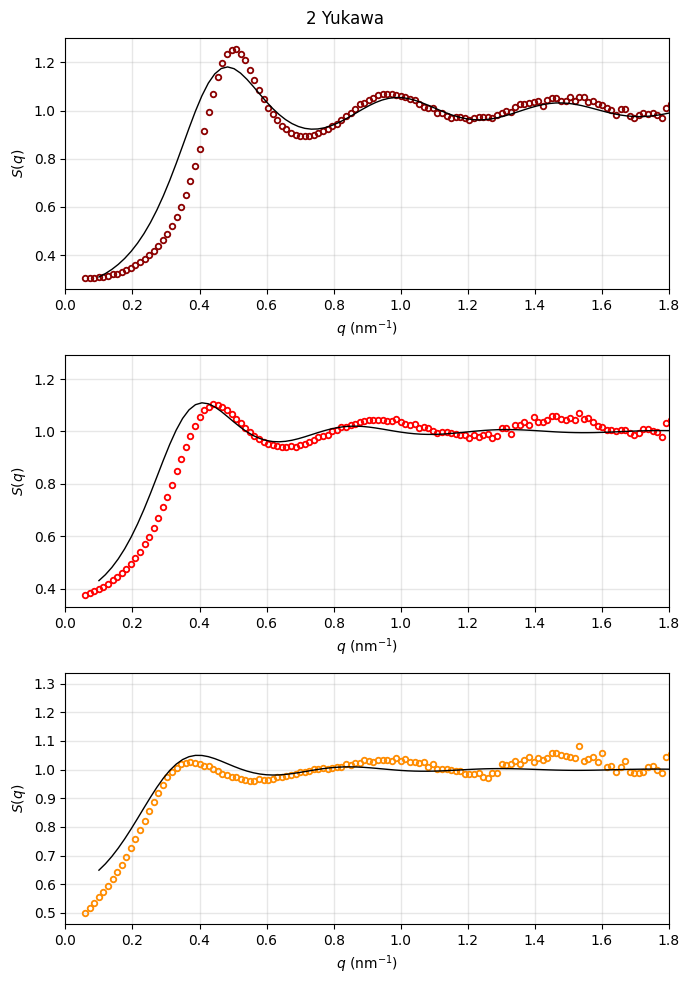

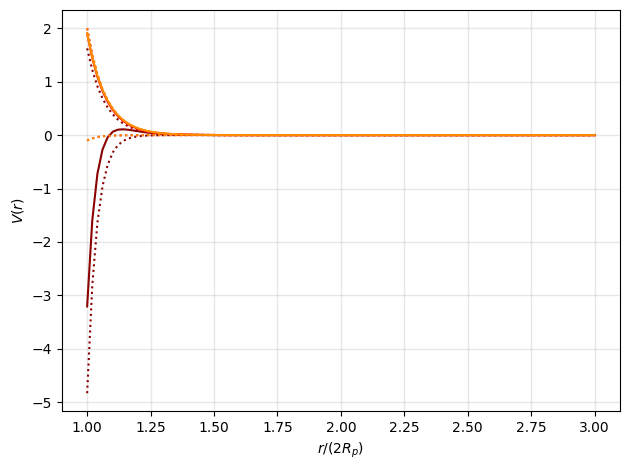

In [281]:


#colore_concentration=['lightcoral','royalblue','orange','forestgreen']
#colore_concentration=['darkblue','blue','dodgerblue','lightblue','forestgreen']
colore_concentration=['darkred','red','darkorange','gold']#['darkblue','blue','dodgerblue','lightblue','forestgreen']


rescaling_factor=1.02

def Sq_2Y_f(q_sf,r,volume_fraction,k1,k2,l1,l2):
    Sq_js=js.sf.twoYukawa(q_sf, R=r, K1=k1, K2=-k2, scl1=l1, scl2=l2,phi=volume_fraction)
    return Sq_js.Y

vf,k1,k2,sl1,sl2 = (np.zeros([3]) for i in range(5))
R0=6.6
qplot=np.linspace(.1,2.,100)

fig1=plt.figure(figsize=(7,10))



fig2=plt.figure()


for i in range(3):
    plt.figure(fig1)
    plt.suptitle('2 Yukawa')
    plt.subplot(3,1,i+1)
    #plt.plot(qvalues,s_discretized[:,i], color=colore_concentration[i],marker=markershape[i], ls='',   markeredgewidth=.3,markeredgecolor='black')
    
    plt.plot(qS[::5],S[i,::5]*rescaling_factor,color=colore_concentration[i],marker='o', ls='', markersize=4, markeredgewidth=1.3,markerfacecolor='none')
                        # radius     # volume_fraction      att     rep     r att       r rep
    param_lower=        [R0-0.02,     vf_i[i]-0.01,        0,      0,      0/(2*R0),     .49/(2*R0),       ]

    param_upperboundary=[R0+0.02,     vf_i[i]+0.01,        10,      31,      10/(2*R0),   100/(2*R0),]   
    
    param_initialguess= [R0,             vf_i[i],           .1,      2,      .55/(2*R0),    1/(2*R0),       ]
       
    
    
    popt, pcov = curve_fit(Sq_2Y_f, xdata=qS[qS<.7], ydata=S[i,qS<.7]*rescaling_factor, 
                            bounds=( param_lower,
                                param_upperboundary),
                        p0=param_initialguess )
    vf[i]=popt[1] 
    k1[i]=popt[2] 
    k2[i]=popt[3]
    sl1[i]=popt[4]
    sl2[i]=popt[5]
    

    plt.plot(qplot,Sq_2Y_f(qplot,*popt),lw=1,c='black')
        
    print(popt[2:])
    plt.ylabel('$S(q)$')
    plt.xlabel('$q$ (nm$^{-1}$)')
    plt.tight_layout()

       
    plt.grid('on',lw=1,alpha=.3)
    
    plt.xlim(0,1.8)
    plt.figure(fig2)
    rad=np.linspace(1,3,100)

    #plt.plot(rad,popt[2]*np.exp(-(rad-1)*popt[4])/rad,color=colore_concentration[i],ls='dotted')
    #plt.plot(rad,-popt[3]*np.exp(-(rad-1)*popt[5])/rad,color=colore_concentration[i],ls='dashed')
    plt.plot(rad,-popt[2]/rad*np.exp(-(rad-1)/popt[4])+popt[3]/rad*np.exp(-(rad-1)/popt[5]),color=colore_concentration[i])

    plt.plot(rad,+popt[3]/rad*np.exp(-(rad-1)/popt[5]),color=colore_concentration[i],ls='dotted')
    plt.plot(rad,-popt[2]/rad*np.exp(-(rad-1)/popt[4]),color=colore_concentration[i],ls='dotted')
    plt.tight_layout()
    
    #plt.plot(rad,-k1*np.exp(-(rad-1)/sl1)+k2*np.exp(-(rad-1)/sl2))
    plt.xlabel('$r/(2R_p)$')
    plt.ylabel('$V(r)$')
    plt.grid('on',lw=1,alpha=.3)

## RMSA fit

[  6.39         0.206        0.50174502 101.74845661]
[6.39000000e+00 1.13000000e-01 2.17278084e+00 1.60000000e+02]
[6.41000000e+00 5.78678113e-02 2.86579628e+00 9.36477204e+01]


(0.0, 1.7)

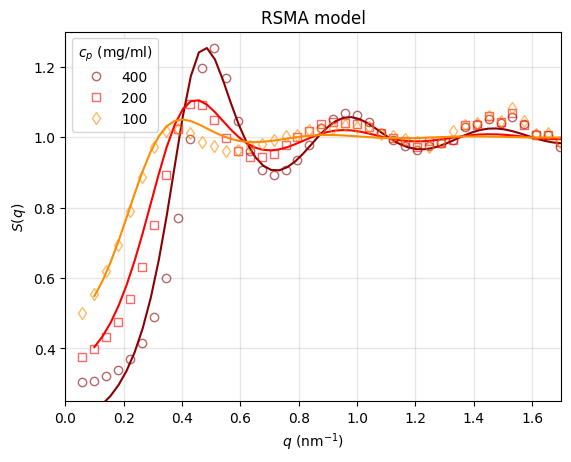

In [331]:

markershape=['o','s','d','p','h']

qv=np.linspace(.2,.8,20)

rescaling_factor=1.02


def sfRMSA(qv, R, eta,scl, gamma):
    Sq_js=js.sf.RMSA(qv, R=R, eta=eta,scl=scl, gamma=gamma,)
    return(Sq_js.Y)


fig,axs = plt.subplots(1,1,)

#fig, axs = plt.subplots(3,1, sharex=True, gridspec_kw=dict(height_ratios=[1, 1,1]))
 
plt.title('RSMA model')
for i in range(3):
    axs.plot(qS[::15],S[i,::15]*rescaling_factor,color=colore_concentration[i],marker=markershape[i],label=concs[i],  markerfacecolor='none',ls='',alpha=.6)
    
    
    param_lower=        [ 6.39  ,vf_i[i]-.02,   .5,  10]
    param_upperboundary=[ 6.41 , vf_i[i]+.02, 6,    160]
    param_initialguess= [ 6.4, vf_i[i],   1 ,  70]


    popt, pcov = curve_fit(sfRMSA, xdata=qS[qS<1.5], ydata=S[i,qS<1.5]*rescaling_factor,
                            bounds=( param_lower,
                                 param_upperboundary),
                        p0=param_initialguess )
    
    
    qplot=np.linspace(.1,2.,70)
        
    axs.plot(qplot,sfRMSA(qplot,*popt),color=colore_concentration[i])

    print(popt)
    axs.grid('on',lw=1,alpha=.3)
    axs.set_ylabel('$S(q)$')
    axs.set_ylim(0.25,1.3)
axs.legend(title='$c_p$ (mg/ml)')
axs.set_xlabel('$q$ (nm$^{-1}$)')
axs.set_xlim(0,1.7)


[  6.39         0.206        0.50174502 101.74845661]
[6.39000000e+00 1.13000000e-01 2.17278084e+00 1.60000000e+02]
[6.41000000e+00 5.78678113e-02 2.86579628e+00 9.36477204e+01]


(0.0, 1.4)

<Figure size 700x1000 with 0 Axes>

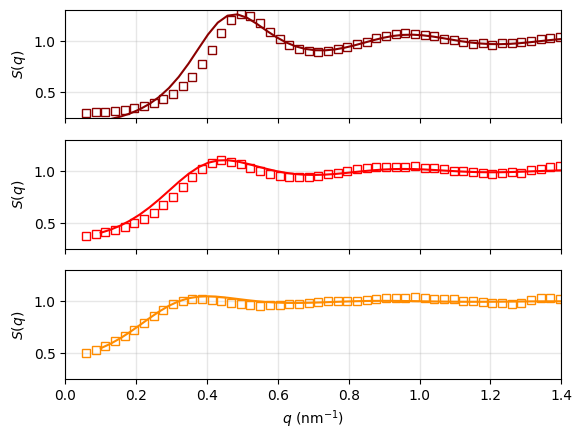

In [304]:



qv=np.linspace(.2,.8,20)

rescaling_factor=1.02


def sfRMSA(qv, R, eta,scl, gamma):
    Sq_js=js.sf.RMSA(qv, R=R, eta=eta,scl=scl, gamma=gamma,)
    return(Sq_js.Y)


plt.figure(figsize=(7,10))

fig, axs = plt.subplots(3,1, sharex=True, gridspec_kw=dict(height_ratios=[1, 1,1]))
 
#plt.suptitle('RSMA')
for i in range(3):
    #plt.plot(qvalues,s_discretized_micheal[:,i],color=colore[i],label=f'120',marker='o',   markeredgewidth=.3,markeredgecolor='black')
    axs[i].plot(qS[::10],S[i,::10]*rescaling_factor,color=colore_concentration[i],label=f'120',marker='s',  markerfacecolor='none',ls='')
    


    
    param_lower=        [ 6.39  ,vf_i[i]-.02,   .5,  10]
    param_upperboundary=[ 6.41 , vf_i[i]+.02, 6,    160]
    param_initialguess= [ 6.4, vf_i[i],   1 ,  70]


    popt, pcov = curve_fit(sfRMSA, xdata=qS[qS<1.5], ydata=S[i,qS<1.5]*rescaling_factor,
                            bounds=( param_lower,
                                 param_upperboundary),
                        p0=param_initialguess )
    
    
    qplot=np.linspace(.1,2.,70)
        
    axs[i].plot(qplot,sfRMSA(qplot,*popt),color=colore_concentration[i])

    print(popt)
    axs[i].grid('on',lw=1,alpha=.3)
    axs[i].set_ylabel('$S(q)$')
    axs[i].set_ylim(0.25,1.3)
    
axs[i].set_xlabel('$q$ (nm$^{-1}$)')
axs[i].set_xlim(0,1.4)


## Hard spheres

[6.5   0.196]
[6.5   0.103]
[6.5    0.0565]


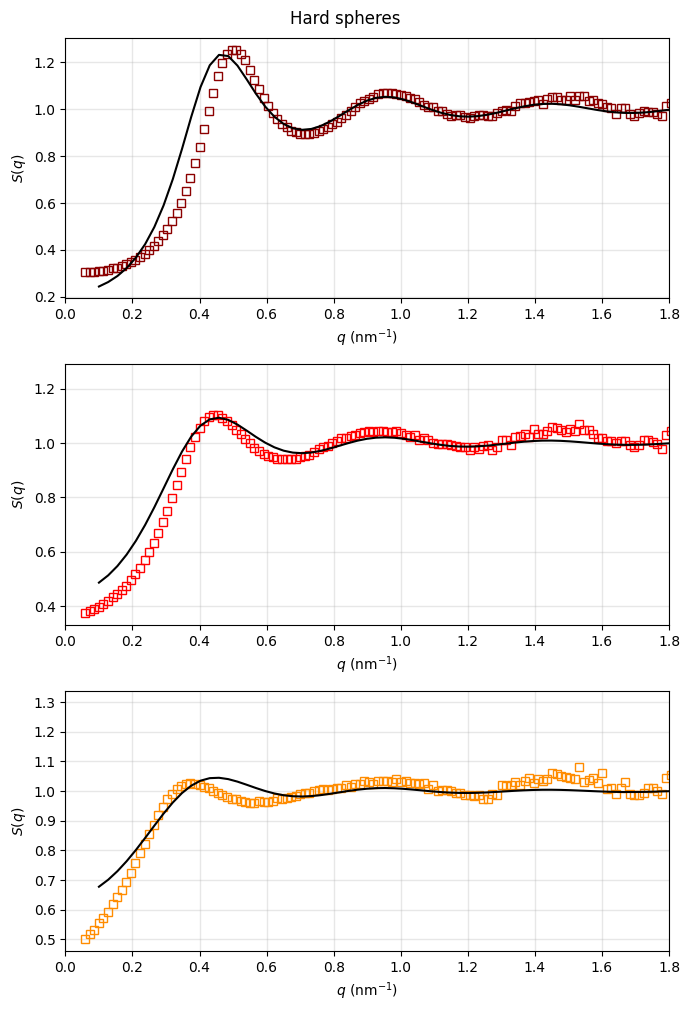

In [283]:


rescaling_factor=1.02


def sfHS(qv, R, eta,):
    Sq_js=js.sf.PercusYevick(qv, R=R, eta=eta,)
    return(Sq_js.Y)

plt.figure(figsize=(7,10))

plt.suptitle('Hard spheres')
for i in range(3):
    plt.subplot(3,1,i+1)
    
    #plt.plot(qvalues,s_discretized_micheal[:,i],color=colore[i],label=f'120',marker='o',   markeredgewidth=.3,markeredgecolor='black')
    plt.plot(qS[::5],S[i,::5]*rescaling_factor,color=colore_concentration[i],label=f'120',marker='s',  markerfacecolor='none',ls='')
    


    
    param_lower=        [ R0-0.1  ,vf_i[i]-.01,   ]
    param_upperboundary=[ R0+0.1 , vf_i[i]+.01, ]
    param_initialguess= [ R0, vf_i[i],  ]


    popt, pcov = curve_fit(sfHS, xdata=qS[qS<.5
], ydata=S[i,qS<.5]*rescaling_factor,
                            bounds=( param_lower,
                                 param_upperboundary),
                        p0=param_initialguess )
    
    
    qplot=np.linspace(.1,2.,70)
        
    plt.plot(qplot,sfHS(qplot,*popt),color='k')

    print(popt)
    plt.grid('on',lw=1,alpha=.3)
    plt.tight_layout()
    plt.ylabel('$S(q)$')
    plt.xlabel('$q$ (nm$^{-1}$)')

    plt.xlim(0,1.8)
    
    
    

## Sticky hard spheres

[6.5        0.20786    1.         0.30891054]
[6.5    0.1037 1.     0.1   ]
[6.61161665 0.05255    1.         0.1       ]


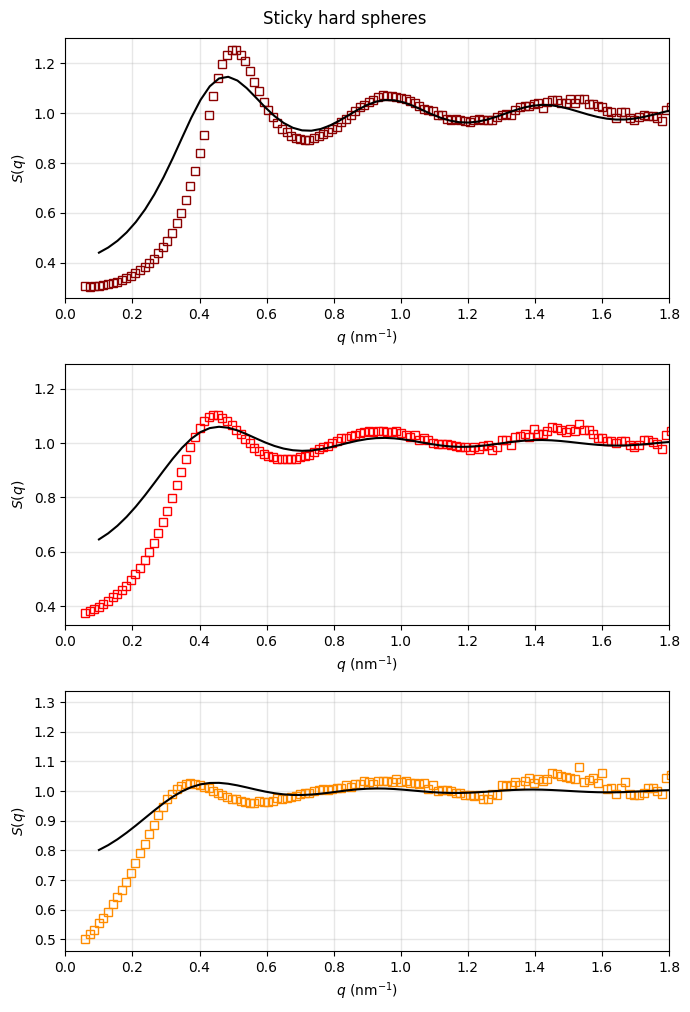

In [173]:
r=6.7
volume_fraction=.2
depths=np.linspace(1.5,30,20)
colori=plt.cm.jet(np.linspace(0,1,len(depths)))


def Sq_SHS(q_sf,r,volume_fraction,w,d):
    Sq_js=np.array(js.sf.stickyHardSphere(q_sf, R=r, width=w, depth=d, phi=volume_fraction))
    return Sq_js[1,:]    


rescaling_factor=1.02

plt.figure(figsize=(7,10))

plt.suptitle('Sticky hard spheres')
for i in range(3):
    plt.subplot(3,1,i+1)
    #plt.plot(qvalues,s_discretized_micheal[:,i],color=colore[i],label=f'120',marker='o',   markeredgewidth=.3,markeredgecolor='black')
    plt.plot(qS[::5],S[i,::5]*rescaling_factor,color=colore_concentration[i],label=f'120',marker='s',  markerfacecolor='none',ls='')
    


    
    param_lower=        [ 6.5  ,vf_i[i]-.02,1,.1  ]
    param_upperboundary=[ 6.8 , vf_i[i]+.02,100,1000 ]
    param_initialguess= [ 6.6, vf_i[i],2,1  ]


    popt, pcov = curve_fit(Sq_SHS, xdata=qS[qS<1.], ydata=S[i,qS<1.]*rescaling_factor,
                            bounds=( param_lower,
                                 param_upperboundary),
                        p0=param_initialguess )
    
    
    qplot=np.linspace(.1,2.,70)
        
    plt.plot(qplot,Sq_SHS(qplot,*popt),color='k')

    print(popt)
    plt.grid('on',lw=1,alpha=.3)
    plt.tight_layout()
    plt.ylabel('$S(q)$')
    plt.xlabel('$q$ (nm$^{-1}$)')
    plt.xlim(0,1.8)